# He and H population

- 2020.06.10   k.i. 
- 2020.07.16   k.i., u.k.    population plot
- 2020.07.20   k.i.  add Src & tau_1D in both CloudModel.py    

In [1]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np

#%matplotlib inline
#%matplotlib qt
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%load_ext autoreload
%autoreload 2

from spectra_src.ImportAll import *
import warnings
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', DeprecationWarning)

In [2]:
from spectra_src.Struct import Atom, Atmosphere, Radiation
from spectra_src.Atomic import Collision, SEsolver, ContinuumOpacity
from spectra_src.Util import HelpUtil
from spectra_src.Visual import Plotting#, Grotrian
from spectra_src.Atomic import LTELib
from spectra_src.Function.SEquil import SELib
from spectra_src.Function.SlabModel import CloudModel
from spectra_src.Atomic import Hydrogen

from spectra_src import Constants as Cst

In [8]:
from spectra_src.Experimental.ExLibTmp import extract_lprof, each_prof, level_info

## Create atomic model

In [3]:
# Atomic model
import os

conf_path = os.path.join( CFG._ROOT_DIR, "data/conf/H.conf" )
atom_H, wMesh_H, path_dict_H = Atom.init_Atom_(conf_path , is_hydrogen=True)
conf_path = os.path.join( CFG._ROOT_DIR, "data/conf/He.conf" )
atom_He, wMesh_He, path_dict_He = Atom.init_Atom_(conf_path , is_hydrogen=False)


In [4]:
HelpUtil.help_( atom_He )
path_dict_He

------------------------------------------------------------------------------------------
name                       type                                 value/len/shape
------------------------------------------------------------------------------------------
Atom
|- Z                       int                                  v: 2
|- Mass                    float                                v: 4.0026
|- Abun                    float                                v: 0.09772372209558111
|- nLevel                  int                                  v: 27
|- nLine                   int                                  v: 205
|- nCont                   int                                  v: 26
|- nTran                   int                                  v: 231
|- nRL                     int                                  v: 39
|- Level                   struct array                         s: (27,)
  |-  erg                  float64                              s: (27,)
  |- 

{'folder': 'E:\\share\\src\\projects\\20220620.spectra\\data\\atom\\He',
 'conf': 'E:\\share\\src\\projects\\20220620.spectra\\data\\conf\\He.conf',
 'Level': 'E:\\share\\src\\projects\\20220620.spectra\\data\\atom\\He\\He.Level',
 'Aji': 'E:\\share\\src\\projects\\20220620.spectra\\data\\atom\\He\\He.Aji',
 'CEe': 'E:\\share\\src\\projects\\20220620.spectra\\data\\atom\\He\\He.CE.electron',
 'CIe': 'E:\\share\\src\\projects\\20220620.spectra\\data\\atom\\He\\He.CI.electron',
 'PI': 'E:\\share\\src\\projects\\20220620.spectra\\data\\atom\\He\\He.Alpha',
 'RadiativeLine': 'E:\\share\\src\\projects\\20220620.spectra\\data\\atom\\He\\He.RadiativeLine',
 'Grotrian': 'E:\\share\\src\\projects\\20220620.spectra\\data\\atom\\He\\He.Grotrian'}

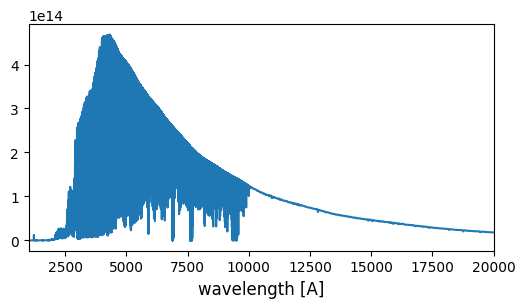

In [18]:
#  prepare solar radiation spectrum

atmos = Atmosphere.Atmosphere0D(Nh=1.E12, Ne=1.E11, Te=7.E3, Vd=0., Vt=5.E5)
solar_spec_H = Radiation.init_Radiation_(atmos, wMesh_H)
solar_spec_He = Radiation.init_Radiation_(atmos, wMesh_He)
wl0 = solar_spec_H.backRad[0,:]*1E8  # wavelength of background spectrum [A]
Isolar = solar_spec_H.backRad[1,:].copy()   # solar spectrum intensity    "    [erg/cm^3/s/str]
solar_spec_H.backRad[1,:] *= 0.5    # solar spectrum mean intensity    "    [erg/cm^3/s/str]
solar_spec_He.backRad[1,:] *= 0.5   # solar spectrum mean intensity    "    [erg/cm^3/s/str]
solar_spec_H.PI_intensity[:,:] *= 0.5    # solar spectrum mean intensity    "    [erg/cm^3/s/str]
solar_spec_He.PI_intensity[:,:] *= 0.5   # solar spectrum mean intensity    "    [erg/cm^3/s/str]


fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=100)
ax.plot(wl0, Isolar)
ax.set_xlim(1000, 20000)
#ax.set_ylim(0,0.1E14)
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel("wavelength [A]", fontsize=12)
plt.show()

## output intensity profile from a slab without background (emission)

In [6]:
from spectra_src.Function.SlabModel import CloudModel

Te = 7000.
Nh = 1e11
Ne = 1e10
Vd = 0.
Vt = 5e5            #   cm/s
depth = 1.E3 * 1.E5 #   km *1e5

slab = Atmosphere.Atmosphere0D(Nh=Nh, Ne=Ne, Te=Te, Vd=Vd, Vt=Vt, use_Tr=False)     # slab 
SE_H, Rate_H = SELib.cal_SE_with_Nh_Te_(atom_H, slab, wMesh_H, solar_spec_H, None)  #  level populations etc.
lH = CloudModel.SE_to_slab_0D_(atom_H, slab, SE_H, depth=depth)      # hydrogen lines intensity
SE_He, Rate_He = SELib.cal_SE_with_Nh_Te_(atom_He, slab, wMesh_He, solar_spec_He, SE_H.n_SE)  #  level populations etc.
lHe = CloudModel.SE_to_slab_0D_(atom_He, slab, SE_He, depth=depth)      # hydrogen lines intensity


E:\share\src\projects\20220620.spectra\spectra_src\Function\SlabModel\CloudModel.py:47: RuntimeWarning: invalid value encountered in true_divide
  Src   : T_ARRAY = ( Aji * nj ) / ( Bij * ni - Bji * nj )


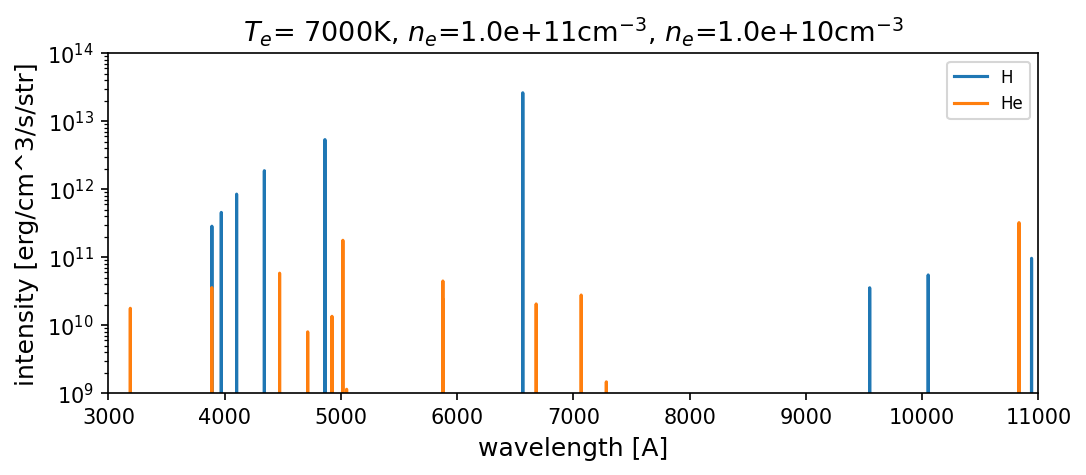

In [326]:
fig, ax = plt.subplots(1,1, figsize=(8,3), dpi=150)
ax.plot(lH.wl_1D*1e8,lH.prof_1D,label='H')
ax.plot(lHe.wl_1D*1e8,lHe.prof_1D,label='He')
ax.set_ylim(1e9,1E14)
#ax.set_xlim(500, 50000)
#ax.set_xscale("log")
ax.set_xlim(3000, 11000)
ax.set_yscale("log")
#ax.set_ylim(0, 2e13)
ax.set_xlabel("wavelength [A]", fontsize=12)
ax.set_ylabel("intensity [erg/cm^3/s/str]", fontsize=12)
plt.title("$T_e$={0:5.0f}K, $n_e$={1:5.1e}cm$^{{-3}}$, $n_e$={2:5.1e}cm$^{{-3}}$".format(Te, Nh, Ne),fontsize=13)
ax.legend(fontsize=8,ncol=1)
plt.show()

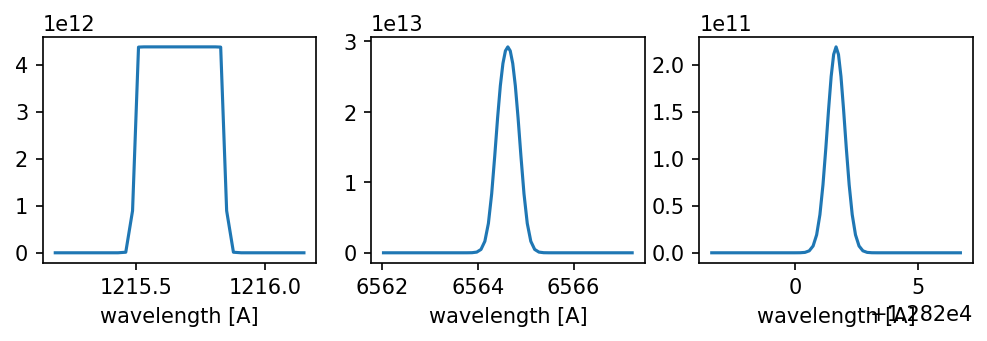

In [9]:
#  plot hydrogen lines

fig, axs = plt.subplots(1,3, figsize=(8,2), dpi=150)
for k in [0]:
    for j in [0,1,2]:
        wl, prof = each_prof(lH,j*7+k)
        axs[j].plot(wl*1e8,prof)
        axs[j].set_xlabel("wavelength [A]", fontsize=10)
        #axs[k,j].set_ylabel("intensity [erg/cm^3/s/str]", fontsize=10)
        
plt.show()

l.Src[20]=+5.08E+13
l.Src[21]=+5.08E+13
l.Src[22]=+5.08E+13


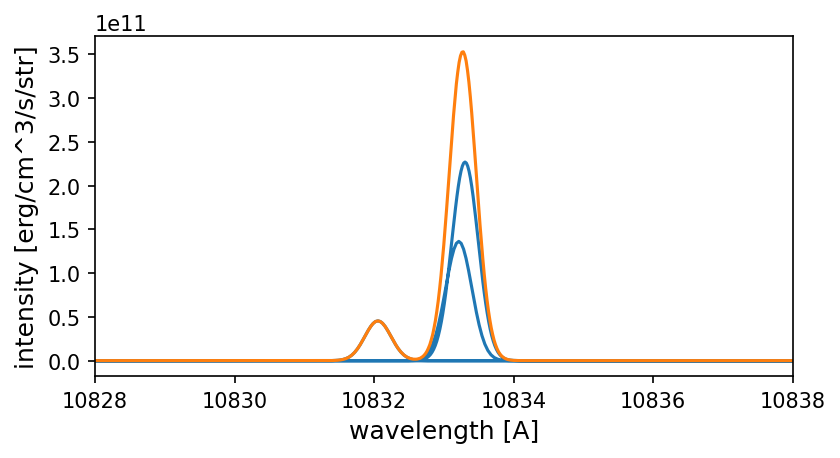

In [10]:
# plot HeI 10830 profile

wmin = 10828 ; wmax = 10838 ; dw = 0.02
wl,prof = extract_lprof(lHe,wmin,wmax,dw)

fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=150)
ax.plot(lHe.wl_1D*1e8,lHe.prof_1D)
ax.plot(wl,prof)

ax.set_xlim(wmin, wmax)
#ax.set_ylim(1e9,1E14)
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel("wavelength [A]", fontsize=12)
ax.set_ylabel("intensity [erg/cm^3/s/str]", fontsize=12)
plt.show()

In [11]:
##  method to access to Level info.
atom = atom_He
print('level stage',atom.Level['stage'])
print('level energy',atom.Level['erg'])
print('config. term, j',atom._ctj_table.Level[3])     
int(atom._ctj_table.Level[3][1][0]) == 1

level stage [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 3]
level energy [0.00000000e+00 3.17545235e-11 3.30301129e-11 3.35881704e-11
 3.35881856e-11 3.35883818e-11 3.39950204e-11 3.63989963e-11
 3.67223971e-11 3.68614031e-11 3.69680642e-11 3.69680647e-11
 3.69680735e-11 3.69687437e-11 3.69894818e-11 3.78016895e-11
 3.79292418e-11 3.79842328e-11 3.80294101e-11 3.80298016e-11
 3.93933398e-11 1.04783117e-10 1.04783799e-10 1.16892729e-10
 1.16892931e-10 1.16893115e-10 1.26580211e-10]
config. term, j ('1s.2p', '3P', '2')


False

## output intensity profile from a slab with continuum background

### cloud model: $\qquad$    $I_{out} = I_{c} e^{-\tau} + S (1-e^{-\tau})$


In [9]:
from spectra_src.Experimental.ExLibTmp import each_prof, extract_lprof

In [14]:
#from spectra_src.Function.SlabModel import CloudModel

Te = 7000.
Nh = 3e11
Ne = 1e10
Vd = 0.
Vt = 5e5            #   cm/s
depth = 1.E3 * 1.E5 #   km *1e5

slab = Atmosphere.Atmosphere0D(Nh=Nh, Ne=Ne, Te=Te, Vd=Vd, Vt=Vt, use_Tr=False)     # slab 
SE_H, Rate_H = SELib.cal_SE_with_Nh_Te_(atom_H, slab, wMesh_H, solar_spec_H, None)  #  level populations etc.
print(f"Nh = {slab.Nh:.2E}[cm^-3],Ne = {slab.Ne:.2E}[cm^-3],  Ne/Nh = {slab.Ne / slab.Nh:.1%}")


lH = CloudModel.SE_to_slab_0D_(atom_H, slab, SE_H, depth=depth)      # hydrogen lines intensity
SE_He, Rate_He = SELib.cal_SE_with_Nh_Te_(atom_He, slab, wMesh_He, solar_spec_He, SE_H.n_SE)  #  level populations etc.
lHe = CloudModel.SE_to_slab_0D_(atom_He, slab, SE_He, depth=depth)      # hydrogen lines intensity

print(f"Nh = {slab.Nh:.2E}[cm^-3],Ne = {slab.Ne:.2E}[cm^-3],  Ne/Nh = {slab.Ne / slab.Nh:.1%}")



Nh = 3.00E+11[cm^-3],Ne = 7.98E+10[cm^-3],  Ne/Nh = 26.6%
Nh = 3.00E+11[cm^-3],Ne = 7.98E+10[cm^-3],  Ne/Nh = 26.6%


In [15]:
conf_path = os.path.join( CFG._ROOT_DIR, "data/conf/He.conf" )
atom_He, wMesh_He, path_dict_He = Atom.init_Atom_(conf_path , is_hydrogen=False)

solar_spec_He = Radiation.init_Radiation_(atmos, wMesh_He)
#solar_spec_He.backRad[1,:] *= 0.5   # solar spectrum mean intensity    "    [erg/cm^3/s/str]
#solar_spec_He.PI_intensity[:,:] *= 0.5   # solar spectrum mean intensity    "    [erg/cm^3/s/str]
solar_spec_He0 = Radiation.init_Radiation_(atmos, wMesh_He)
solar_spec_He0.backRad[1,:] *= 0.5   # solar spectrum mean intensity    "    [erg/cm^3/s/str]
solar_spec_He0.PI_intensity[:,:] *= 0.5   # solar spectrum mean intensity    "    [erg/cm^3/s/str]

Te = 7000.
Nh = 3e11
Ne = 1e10
Vd = 0.
Vt = 5e5            #   cm/s
depth = 1.E3 * 1.E5 #   km *1e5

slab = Atmosphere.Atmosphere0D(Nh=Nh, Ne=Ne, Te=Te, Vd=Vd, Vt=Vt, use_Tr=False)     # slab 
SE_H, Rate_H = SELib.cal_SE_with_Nh_Te_(atom_H, slab, wMesh_H, solar_spec_H, None)  #  level populations etc.
print(f"Nh = {slab.Nh:.2E}[cm^-3],Ne = {slab.Ne:.2E}[cm^-3],  Ne/Nh = {slab.Ne / slab.Nh:.1%}")
#lH = CloudModel.SE_to_slab_0D_(atom_H, slab, SE_H, depth=depth)      # hydrogen lines intensity

wave_uv = 540*1.E-8   # [cm]
amp_facs = np.logspace(-3, 2, 101)
namp = amp_facs.shape[0]
taumax10830 = np.empty( (namp,3) )
popratio_10830 = np.empty( (namp,4) )
klevels = [1,3,4,5]
klines  = [20,21,22]
ctjs = [' '.join(atom_He._ctj_table.Level[i]) for i in klevels]
for i in range(namp):
    ##: reset background radiation
    solar_spec_He.backRad[1,:] = solar_spec_He0.backRad[1,:]
    solar_spec_He.PI_intensity[:,:] = solar_spec_He0.PI_intensity[:,:]
    ##: amplify
    idxs = np.where(solar_spec_He.backRad[0,:] < wave_uv)[0]
    solar_spec_He.backRad[1,:] *= amp_facs[i]
    idxs = np.where( wMesh_He.Cont_mesh.reshape(-1) < wave_uv )[0]
    solar_spec_He.PI_intensity.reshape(-1)[idxs] *= amp_facs[i]


    SE_He, Rate_He = SELib.cal_SE_with_Nh_Te_(atom_He, slab, wMesh_He, solar_spec_He, SE_H.n_SE)  #  level populations etc.
    lHe = CloudModel.SE_to_slab_0D_(atom_He, slab, SE_He, depth=depth)      # lines intensity
    #print(f"Nh = {slab.Nh:.2E}[cm^-3],Ne = {slab.Ne:.2E}[cm^-3],  Ne/Nh = {slab.Ne / slab.Nh:.1%}")
    #popratio_10830[i,0] = SE_He.n_SE[1]
    #popratio_10830[i,1:] = SE_He.n_SE[3:6]
    popratio_10830[i,:] = SE_He.n_SE[klevels]
    taumax10830[i,:] = lHe.tau_max[klines]

Nh = 3.00E+11[cm^-3],Ne = 7.98E+10[cm^-3],  Ne/Nh = 26.6%


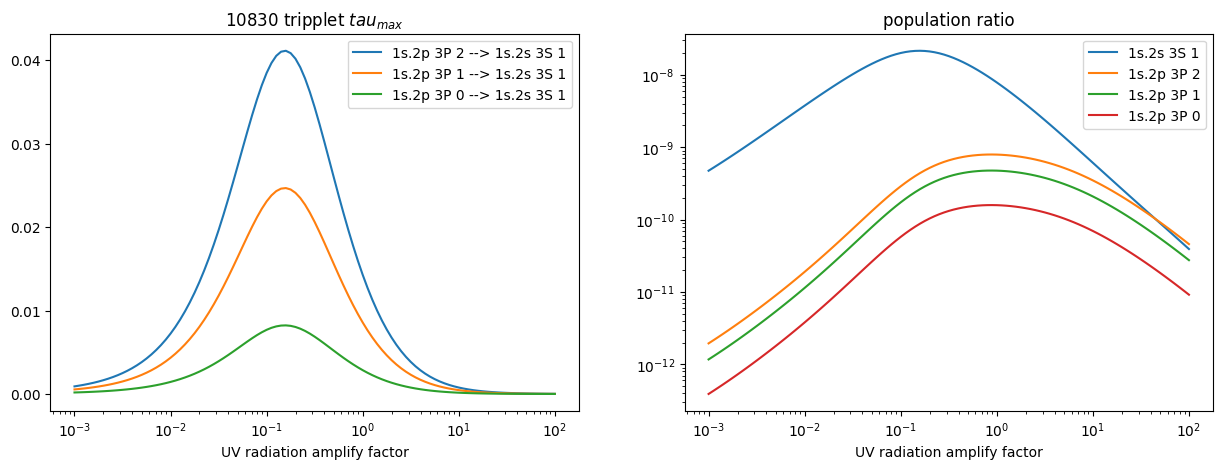

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,5), dpi=100)
ax = axs[0]
for i in range(3):
    ax.plot(amp_facs[:], taumax10830[:,i], label=f"{ctjs[i+1]} --> {ctjs[0]}")
ax.set_xscale('log')
ax.set_title("10830 tripplet $ tau_{max} $")
ax.set_xlabel("UV radiation amplify factor")
ax.legend()

ax = axs[1]
for i in range(4):
    ax.plot(amp_facs[:],popratio_10830[:,i], label=f"{ctjs[i]}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("UV radiation amplify factor")
ax.set_title("population ratio")
ax.legend()
plt.show()

Nh = 3.00E+11[cm^-3],Ne = 7.98E+10[cm^-3],  Ne/Nh = 26.6%
Nh = 3.00E+11[cm^-3],Ne = 7.98E+10[cm^-3],  Ne/Nh = 26.6%
l.Src[7]=+4.15E+13
l.Src[20]=+5.13E+13
l.Src[21]=+5.13E+13
l.Src[22]=+5.14E+13
wavelength = 10833.30, taumax = 0.0143
wavelength = 10833.21, taumax = 0.0086
wavelength = 10832.06, taumax = 0.0029


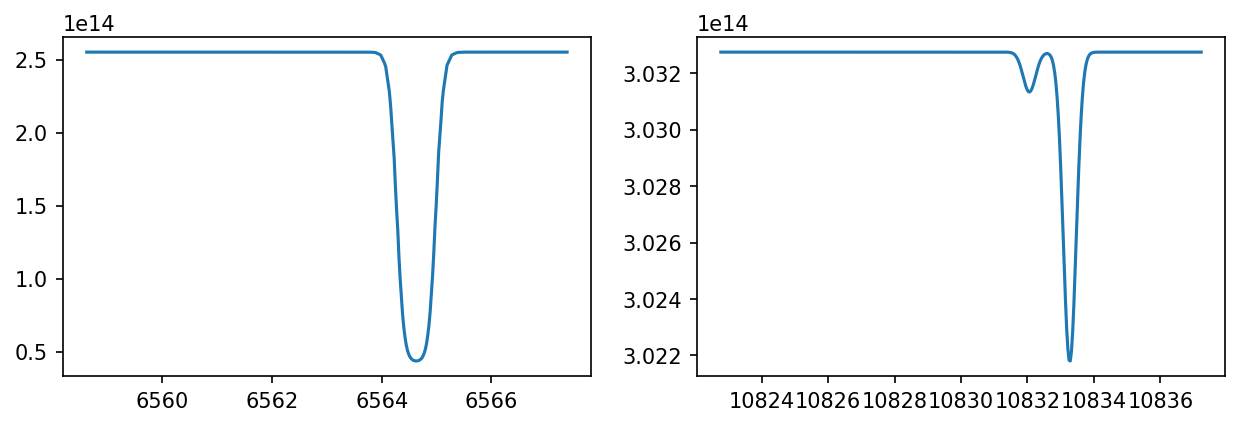

In [21]:
conf_path = os.path.join( CFG._ROOT_DIR, "data/conf/He.conf" )
atom_He, wMesh_He, path_dict_He = Atom.init_Atom_(conf_path , is_hydrogen=False)

solar_spec_He = Radiation.init_Radiation_(atmos, wMesh_He)
solar_spec_He.backRad[1,:] *= 0.5   # solar spectrum mean intensity    "    [erg/cm^3/s/str]
solar_spec_He.PI_intensity[:,:] *= 0.5   # solar spectrum mean intensity    "    [erg/cm^3/s/str]
#solar_spec_He.PI_intensity[:,:] *= 10

##: amplify wavelength < 540 [A]
wave_uv = 540*1.E-8   # [cm]
amp_fac = 1.0
idxs = np.where(solar_spec_He.backRad[0,:] < wave_uv)[0]
solar_spec_He.backRad[1,:] *= amp_fac
idxs = np.where( wMesh_He.Cont_mesh.reshape(-1) < wave_uv )[0]
solar_spec_He.PI_intensity.reshape(-1)[idxs] *= amp_fac



#from spectra_src.Function.SlabModel import CloudModel

Te = 7000.
Nh = 3e11
Ne = 1e10
Vd = 0.
Vt = 5e5            #   cm/s
depth = 1.E3 * 1.E5 #   km *1e5

slab = Atmosphere.Atmosphere0D(Nh=Nh, Ne=Ne, Te=Te, Vd=Vd, Vt=Vt, use_Tr=False)     # slab 
SE_H, Rate_H = SELib.cal_SE_with_Nh_Te_(atom_H, slab, wMesh_H, solar_spec_H, None)  #  level populations etc.
print(f"Nh = {slab.Nh:.2E}[cm^-3],Ne = {slab.Ne:.2E}[cm^-3],  Ne/Nh = {slab.Ne / slab.Nh:.1%}")

#slab.Ne *= 2.0
lH = CloudModel.SE_to_slab_0D_(atom_H, slab, SE_H, depth=depth)      # hydrogen lines intensity
SE_He, Rate_He = SELib.cal_SE_with_Nh_Te_(atom_He, slab, wMesh_He, solar_spec_He, SE_H.n_SE)  #  level populations etc.
lHe = CloudModel.SE_to_slab_0D_(atom_He, slab, SE_He, depth=depth)      # hydrogen lines intensity

print(f"Nh = {slab.Nh:.2E}[cm^-3],Ne = {slab.Ne:.2E}[cm^-3],  Ne/Nh = {slab.Ne / slab.Nh:.1%}")



#  absorption prof.

dv = 1.   #  wavelength step, km/s
vmax = 200.  #  max dwl, km/s

wl0_Ha = 6563. 
dw = dv/Cst.c_*wl0_Ha*1e5
wmin = wl0_Ha - dw*vmax/dv ; wmax = wl0_Ha + dw*vmax/dv
Ic_Ha = np.max(Isolar[np.where((wl0>wmin) & (wl0<=wmax))])
wl_Ha, prof_Ha = extract_lprof(lH,wmin,wmax,dw,Ic=Ic_Ha)  #  prof = Src[k]*(1.- exp(-tau[:])) in CloudModel.SE_to_slab_0D_()

wl0_1083 = 10830.
dw = dv/Cst.c_*wl0_1083*1e5
wmin = wl0_1083 - dw*vmax/dv
wmax = wl0_1083 + dw*vmax/dv
#Ic_1083 = np.max(Isolar[np.where((wl0>wmin) & (wl0<=wmax))])
Ic_1083 = np.interp(wl0_1083, wl0, Isolar)
wl_1083, prof_1083 = extract_lprof(lHe,wmin,wmax,dw,Ic=Ic_1083)  #  prof = Ic*exp(-tau) + l.Src*(1.- exp(-tau)) in CloudModel.SE_to_slab_0D_()

fig, axs = plt.subplots(1,2, figsize=(10,3), dpi=150)
ax = axs[0]
ax.plot(wl_Ha,prof_Ha)
ax = axs[1]
ax.plot(wl_1083,prof_1083)
#ax.set_ylim(0, 4.E14)

#Ic_1083

## tau at 10830 line center
for w, t in zip(atom_He.Line['w0_AA'][20:23], lHe.tau_max[20:23]):
    print(f"wavelength = {w:.2f}, taumax = {t:.4f}")

## lower level population of H and He

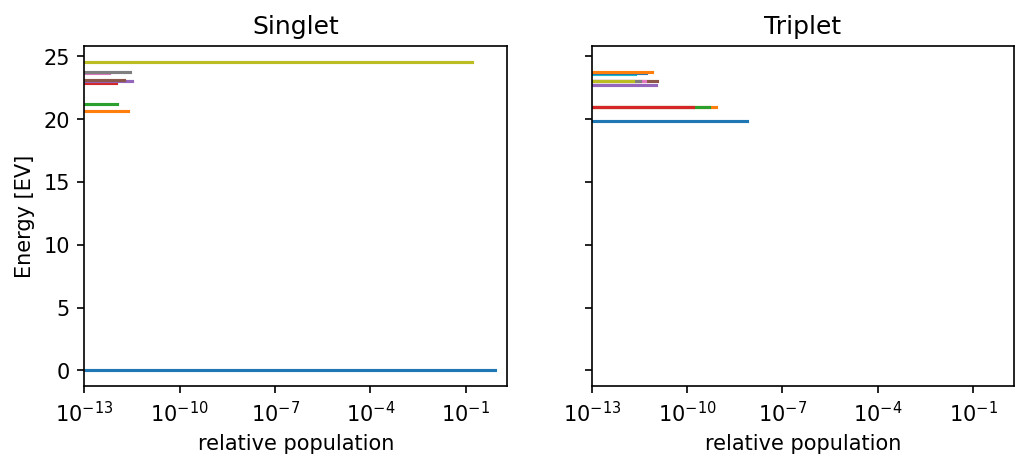

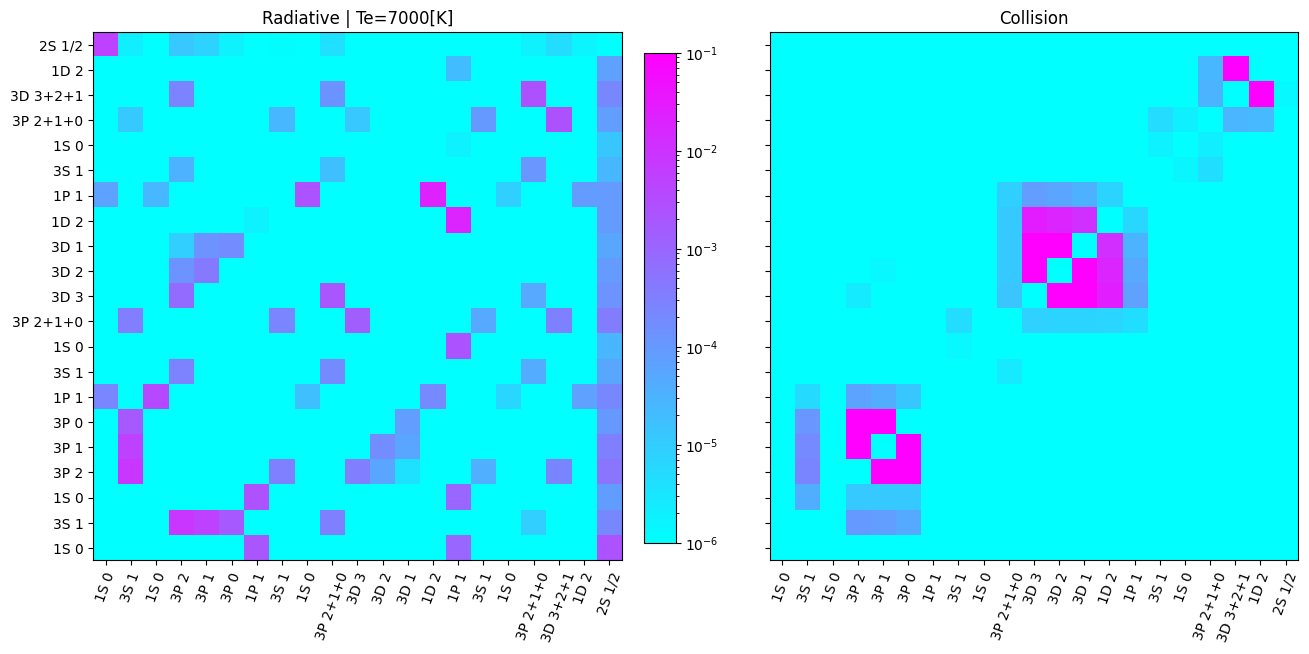

In [22]:
##  plot He populations  ####################################################

# Te = 7000.
# Nh = 1e12
# Ne = 1e10
# Vd = 0.
# Vt = 5e5            #   cm/s
# #depth = 1.E3 * 1.E5 #   km *1e5

# slab = Atmosphere.Atmosphere0D(Nh=Nh, Ne=Ne, Te=Te, Vd=Vd, Vt=Vt, use_Tr=False)     # slab 
# SE_H, Rate_H = SELib.cal_SE_with_Nh_Te_(atom_H, slab, wMesh_H, solar_spec_H, None)  #  level populations etc.
# SE_He, Rate_He = SELib.cal_SE_with_Nh_Te_(atom_He, slab, wMesh_He, solar_spec_He, SE_H.n_SE)  #  level populations etc.

######################################################

atom = atom_He
SE = SE_He
mask = atom.Level['stage'] == 1           # select neutoral
ilevel_heii = np.where(atom.Level['stage'] == 2)[0][0]      # HeI ionization = groud state of HeII

level_erg = atom.Level['erg'][mask]
level_erg = np.append( level_erg, atom.Level['erg'][ilevel_heii] )
level_ev  = level_erg / Cst.eV2erg_
level_energy = level_ev

level_pop = SE.n_SE[mask]
level_pop = np.append( level_pop,  SE.n_SE[np.logical_not(mask)].sum())

fig, axs = plt.subplots(1,2, figsize=[8,3], dpi=150, sharey=True, sharex=True)

#axt = axs.twinx()
for i in range(level_erg.shape[0]):
    s2p1 = int(atom._ctj_table.Level[i][1][0])
    if s2p1 in (1,2):
        ax = axs[0]
        ax.set_title('Singlet')
    elif s2p1 == 3:
        ax = axs[1]
        ax.set_title('Triplet')
    else:
        continue
    #print(i, level_pop[i])
    ax.plot([0,level_pop[i]],level_energy[i]*np.ones(2))
    
for ax in axs:
    ax.set_xscale('log')
    ax.set_xlabel('relative population')
axs[0].set_ylabel('Energy [EV]')
axs[0].set_xlim(1E-13,2)
#ax.plot(level_erg,level_pop,'o')
#ax.barh(level_erg,level_pop, align='center')
#level_erg
plt.show()

##-------------------------------------------------------------------------
# transition heat map
##-------------------------------------------------------------------------


## SE_He, Rate_He
SE_con = SE_He 
Rate_con = Rate_He

kLevel_max = 21

tran_mat = {
    "Radiative" : Rate_con.Rmat[:kLevel_max,:kLevel_max] * SE_con.n_SE[:kLevel_max].reshape(1,-1),
    "Collision" : Rate_con.Cmat[:kLevel_max,:kLevel_max] * SE_con.n_SE[:kLevel_max].reshape(1,-1),
}


fig, axs = plt.subplots(1,2, figsize=(16,7), dpi=100, sharey=True)
norm = LogNorm(1E-6, 1E-1, clip=True)

ax: plt.Axes
for ax, name in zip( axs, ("Radiative", "Collision") ):
    im = ax.imshow( tran_mat[name], origin="lower", cmap="cool", norm=norm )
    if name == "Radiative":
        ax.set_title(name+f" | Te={slab.Te:.0f}[K]") 
    else:
        ax.set_title(name)
    ax.set_xticks([ii for ii in range(kLevel_max)])
    ax.set_yticks([ii for ii in range(kLevel_max)])
    ax.set_xticklabels([f"{ctj[1]} {ctj[2]}" for ctj in atom_He._ctj_table.Level[:kLevel_max]], fontsize=10, rotation=70)
    ax.set_yticklabels([f"{ctj[1]} {ctj[2]}" for ctj in atom_He._ctj_table.Level[:kLevel_max]], fontsize=10, rotation=0)

# colorbar
cax = fig.add_axes([0.48, 0.15, 0.02, 0.7])
fig.colorbar( im, cax=cax, orientation='vertical')

plt.show()

del ax, name, im

# [/s* cm^{-3}]


## level population of H and He as function of $T_e$ and $n_H$

In [276]:
#******  calculate populations in SE & LTS on (Te, Nh) ******
nTe = 51
Te_arr = np.linspace(2000, 30000, nTe)
nNh = nTe
Nh_arr = np.logspace(9, 14, nNh)
Vd = 0.
Vt = 5e5            #   cm/s
#depth = 1.E3 * 1.E5 #   km *1e5

pop_arr_H = {
    "LTE" : np.empty((atom_H.nLevel, nNh, nTe), dtype="float64"),
    "SE"  : np.empty((atom_H.nLevel, nNh, nTe), dtype="float64"),
}
pop_arr_He = {
    "LTE" : np.empty((atom_He.nLevel, nNh, nTe), dtype="float64"),
    "SE"  : np.empty((atom_He.nLevel, nNh, nTe), dtype="float64"),
}
Ne_arr = np.empty((nNh, nTe), dtype="float64")

for j in range(nNh):  
    Nh = Nh_arr[j]
    for k in range(nTe):
        print(f"\r j/nNh={j+1}/{nNh} k/nTe={k+1}/{nTe}", end='\r')
        Te = Te_arr[k]
        slab = Atmosphere.Atmosphere0D(Nh=Nh, Ne=Ne, Te=Te, Vd=Vd, Vt=Vt, use_Tr=False)     # slab 
        SE_H, Rate_H = SELib.cal_SE_with_Nh_Te_(atom_H, slab, wMesh_H, solar_spec_H, None)  #  level populations etc.
        SE_He, Rate_He = SELib.cal_SE_with_Nh_Te_(atom_He, slab, wMesh_He, solar_spec_He, SE_H.n_SE)  #  level populations etc.
        Ne_arr[j,k] = atmos.Ne
        pop_arr_H["LTE"][:,j,k] = SE_H.n_LTE[:]
        pop_arr_H["SE"][:,j,k] = SE_H.n_SE[:]
        pop_arr_He["LTE"][:,j,k] = SE_He.n_LTE[:]
        pop_arr_He["SE"][:,j,k] = SE_He.n_SE[:]
print()


 j/nNh=51/51 k/nTe=51/51


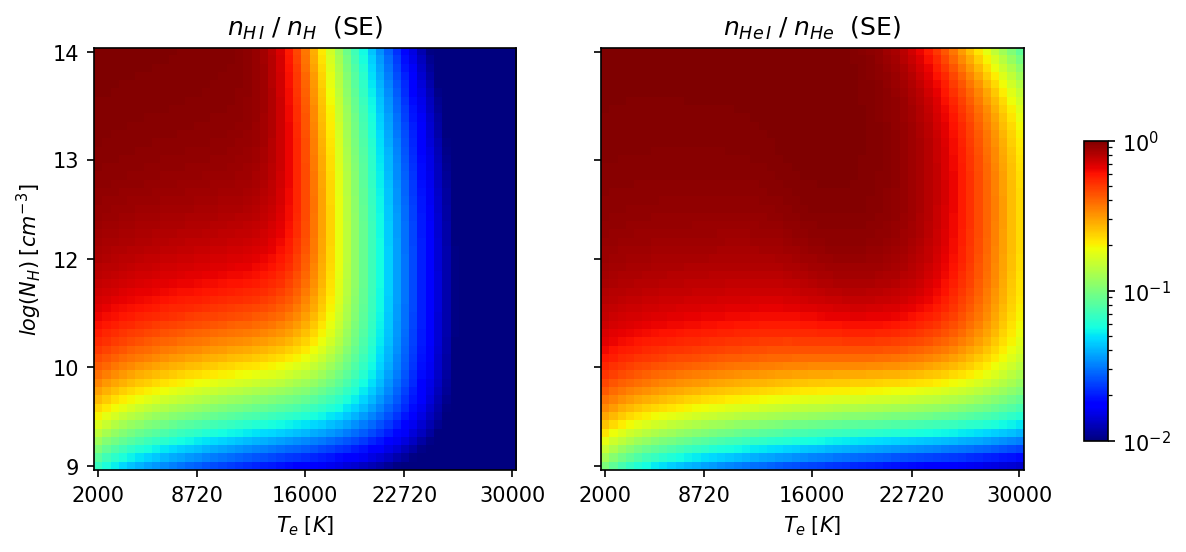

In [277]:
#  display neutral fraction of H and He on (Te, nH) plane

mask_HI = (atom_H.Level['stage'] == 1)
mask_HeI = (atom_He.Level['stage'] == 1)

EQ = "SE"
nHI = np.sum(pop_arr_H[EQ][mask_HI,:,:], axis=0)
nHeI = np.sum(pop_arr_He[EQ][mask_HeI,:,:], axis=0)

fig, axs = plt.subplots(1,2, figsize=(8,4), dpi=150, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2)
cmap = "jet"   #  "inferno"
norm = LogNorm(1E-2, 1E0, clip=True)

ax=axs[0]
#mapH = ax.pcolormesh(Te_arr,Nh_arr,nHI,cmap=cmap,vmin=0,vmax=1.)
im_H = ax.imshow(nHI, cmap=cmap, origin="lower",norm=norm)#, vmin=0, vmax=1.)
Plotting.set_imshow_ticks_(ax, Te_arr, axis='x',points=5, fmt='%1.0f',rot=0)
Plotting.set_imshow_ticks_(ax, np.log10(Nh_arr), axis='y', points=5, fmt='%1.0f',rot=0)
ax.set_title("$ n_{H\, I} \; / \; n_{H} $  ("+EQ+")")
ax.set_ylabel("$log(N_{H}) \; [cm^{-3}]$")
ax.set_xlabel("$T_{e} \; [K]$")

ax = axs[1]
im_He = ax.imshow(nHeI, cmap=cmap, origin="lower",norm=norm)#, vmin=0, vmax=1.)
ax.set_title("$ n_{He\, I} \; / \; n_{He} $  ("+EQ+")")
ax.set_xlabel("$T_{e} \; [K]$")

cax = fig.add_axes([0.95,0.2,0.02,0.5])
fig.colorbar(im_H, cax=cax, orientation="vertical")

plt.show()

Line# = 7
Line# = 21


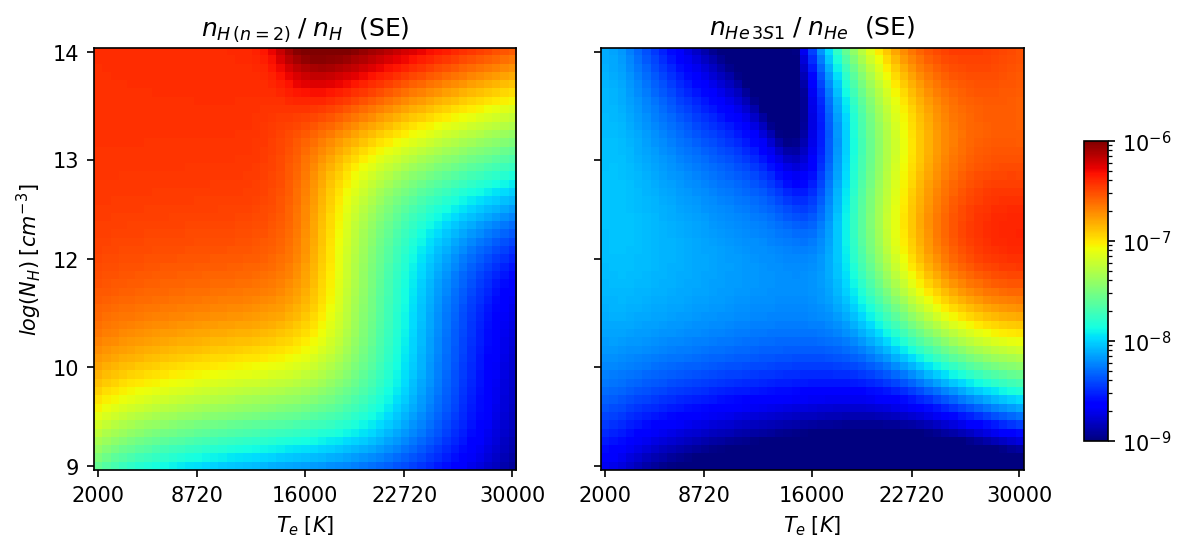

In [281]:
from spectra_src.Experimental.ExLibTmp import level_info


#********************************************************
#  Ha and 10830 lowe level population

lidx_H,lower_H,uidx_H,upper_H = level_info(atom_H, 6563.)
lidx_He,lower_He,uidx_He,upper_He = level_info(atom_He,10830.3)
EQ ="SE"
nH_l = pop_arr_H[EQ][lidx_H,:,:]
nHe_l = pop_arr_He[EQ][lidx_He,:,:]


fig, axs = plt.subplots(1,2, figsize=(8,4), dpi=150, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2)
cmap = "jet"   #  "inferno"
norm = LogNorm(1E-9, 1E-6, clip=True)

ax=axs[0]
#mapH = ax.pcolormesh(Te_arr,Nh_arr,nHI,cmap=cmap,vmin=0,vmax=1.)
im_H = ax.imshow(nH_l, cmap=cmap, origin="lower",norm=norm)#, vmin=0, vmax=1.)
Plotting.set_imshow_ticks_(ax, Te_arr, axis='x',points=5, fmt='%.0f',rot=0)
Plotting.set_imshow_ticks_(ax, np.log10(Nh_arr), axis='y', points=5, fmt='%1.0f',rot=0)

ax.set_title("$ n_{H\, (n=2)} \; / \; n_{H} $  ("+EQ+")")
ax.set_ylabel("$log(N_{H}) \; [cm^{-3}]$")
ax.set_xlabel("$T_{e} \; [K]$")

ax = axs[1]
im_He = ax.imshow(nHe_l, cmap=cmap, origin="lower",norm=norm)#, vmin=0, vmax=1.)
ax.set_title("$ n_{He\, 3S1} \; / \; n_{He} $  ("+EQ+")")
ax.set_xlabel("$T_{e} \; [K]$")

cax = fig.add_axes([0.95,0.2,0.02,0.5])
fig.colorbar(im_H, cax=cax, orientation="vertical")

plt.show()

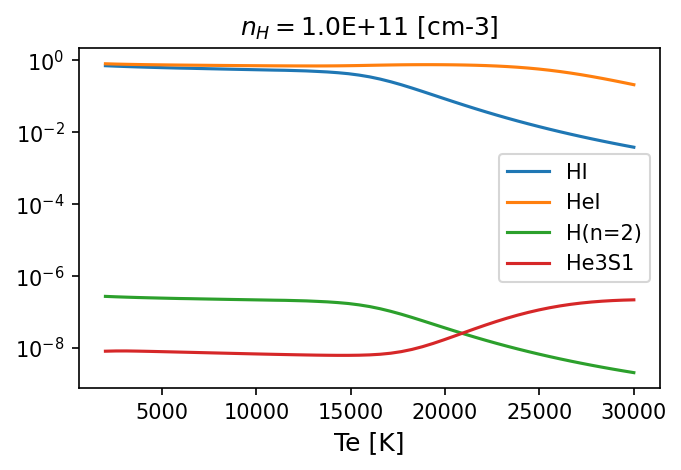

In [283]:
#******************************************************
#  plot population;  neutoral, lower level of Ha & 10830  

j = 20  #  Nh[j]

fig, ax = plt.subplots(1,1, figsize=[5,3], dpi=150)
ax.plot(Te_arr,nHI[j,:],label='HI')
ax.plot(Te_arr,nHeI[j,:],label='HeI')
ax.plot(Te_arr,nH_l[j,:],label='H(n=2)')
ax.plot(Te_arr,nHe_l[j,:],label='He'+lower_He)

ax.set_yscale("log")
ax.set_xlabel("Te [K]", fontsize=12)
plt.title(f"$n_H=${Nh_arr[j]:5.1E} [cm-3]")
plt.legend()

In [148]:


atom = atom_He
wl0 = 10830.4
idxI,lower,idxJ,upper = level_info(atom,wl0)
idxI,lower,idxJ,upper

Line#= 20


(1, '3S1', 3, '3P2')

---

## Grotrian

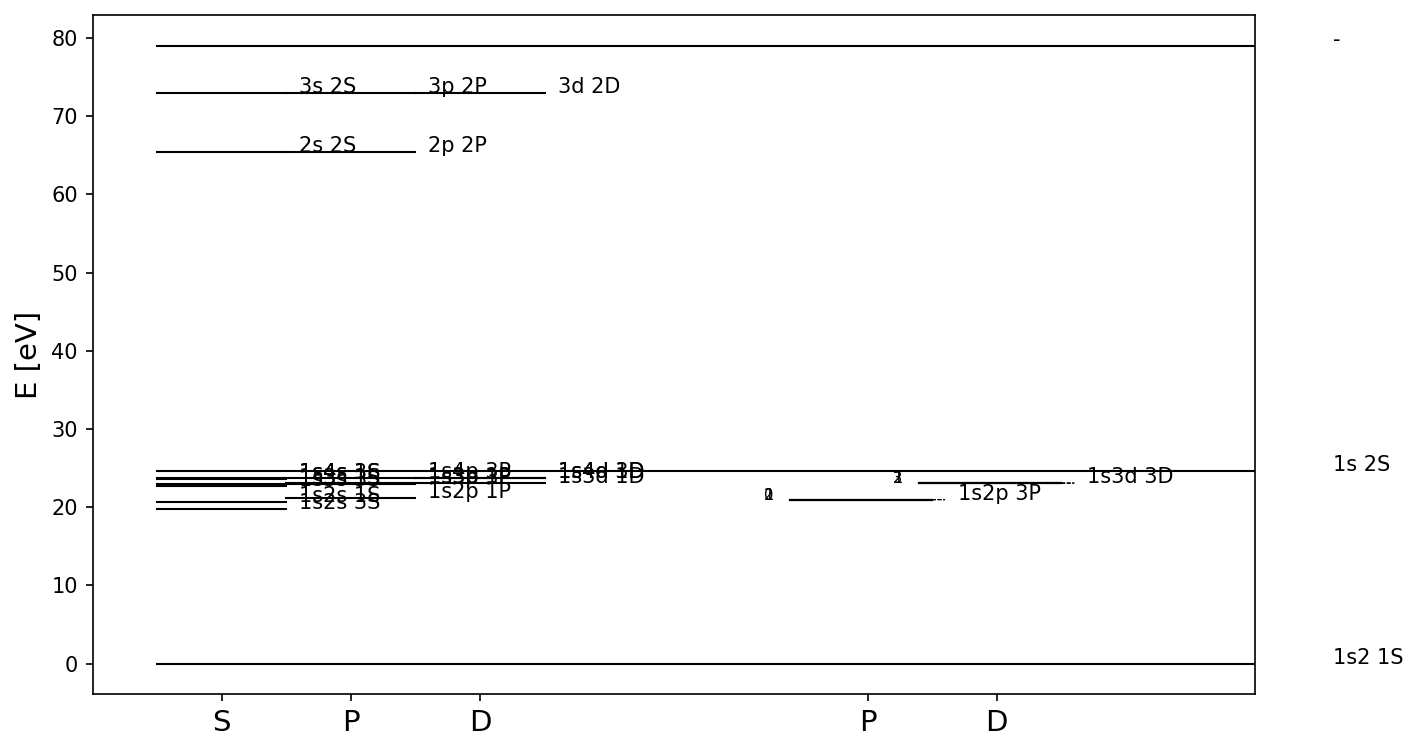

In [116]:
from spectra_src.Visual import Grotrian
gro = Grotrian.Grotrian(atom, path_dict_He["Grotrian"], )
gro.make_fig(_figsize=(10,6),_dpi=150, _f=50)
